In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re , string  , nltk
from nltk import word_tokenize
from nltk.tokenize import *
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *

In [2]:
df=pd.read_csv('C:/Users/Lenovo/Desktop/train_tweet.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
df.tail(10)

,id,label,tweet
31952,31953,0,@user you went too far with @user
31953,31954,0,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [5]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [8]:
negative =df[df['label'] == 0]
negative

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


In [9]:
positive =df[df['label']==1]
positive

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


In [10]:
len(df)

31962

In [11]:
df.shape

(31962, 3)

In [12]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# length of positive and negative tweet

In [13]:
print('len of positive tweet',len(df[df['label']==1]))
print('length of negative tweet',len(df[df['label']==0]))

len of positive tweet 2242
length of negative tweet 29720


# Cleaning data

In [14]:
def Remove_link(text):
    text = re.sub(r'https\S+', '', text)
    text=re.sub(r'http\S+','',text)
    return text

In [15]:
df['tweet']=df['tweet'].apply(lambda tweet:Remove_link(tweet))
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [16]:
def Remove_punctuations(text):
    REPLACE_BY_SPACE_RE  = re.compile('[/(){}\[\]\|]')
    REPLACE_BY_SPACE_RE1 = re.compile('[\"\'،…—.;,-=+]')
    REPLACE_BY_SPACE_RE2 = re.compile('[?!$%^&*]')
    text = re.sub(REPLACE_BY_SPACE_RE,' ',text)
    text = re.sub(REPLACE_BY_SPACE_RE1,' ',text)
    text = re.sub(REPLACE_BY_SPACE_RE2,' ',text)
    return text

In [17]:
df['tweet']=df['tweet'].apply(lambda tweet:Remove_punctuations(tweet))
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can t us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
31957    ate @user isz that youuu ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary ...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [18]:
def Remove_number(text):
    text=re.sub(r'[0-9]+','',text)
    return text

In [19]:
df['tweet']=df['tweet'].apply(lambda tweet:Remove_number(tweet))
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can t us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
31957    ate @user isz that youuu ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary ...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [20]:
def Remove_picture_tag(text):
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    return text

In [21]:
df['tweet']=df['tweet'].apply(lambda tweet:Remove_picture_tag(tweet))
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can t use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
31957    ate  isz that youuu ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary  #wso...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

In [22]:
def remove_emoji(text):
    return text.encode('ascii','ignore').decode('ascii')

In [23]:
df['tweet']=df['tweet'].apply(lambda tweet:remove_emoji(tweet))
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can t use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
31957                                ate  isz that youuu  
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary  #wso...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

In [24]:
def Remove_repeating(text):
    text = re.sub(r'(.+?)\1+', r'\1', text)
    return text

In [25]:
df['tweet']=df['tweet'].apply(lambda tweet:Remove_repeating(tweet))
df['tweet']

0         when a father is dysfunctional and is so self...
1         thanks for #lyft credit i can t use cause the...
2                                      bihday your majesty
3           #model i love u take with u al the time in ur 
4                       factsguide society now #motivation
                               ...                        
31957                                    ate isz that you 
31958     to se nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in #calgary #wso con...
31961                             thank you for you folow 
Name: tweet, Length: 31962, dtype: object

In [26]:
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
print(stopword)

{'her', 'any', 'won', 'shan', "she's", 'both', 'them', 'this', 'are', 'but', 'aren', 'if', 'have', 'it', 'before', "shan't", 'its', 'a', 'she', 'no', 'o', 'yourselves', 'theirs', 'hers', 're', 'doing', 'when', 'shouldn', 'their', 'my', 'in', 'mightn', 'once', "that'll", 'until', 'myself', "wouldn't", 'hasn', 'here', 'can', 'than', 'didn', 'all', 'ourselves', 'most', 'needn', 'ain', 'were', 'of', 'mustn', 'out', 'weren', 'themselves', 'not', 'very', 'from', 'be', "didn't", 'as', 'where', 'above', 'hadn', 'further', "should've", 'did', 'which', 'these', 'the', 'should', 's', 'for', "aren't", "you'll", 'over', 'own', "mustn't", 'our', 'isn', 'under', 'same', 'is', "you've", 'below', 'too', 'yourself', 'through', 'does', 'again', 'yours', 'y', 'only', 'off', 'each', 'him', 'i', 'between', 'on', 'now', 've', 'having', 'about', 'being', "shouldn't", "won't", 'or', "hadn't", 'so', 'down', "couldn't", 'been', 'ours', 'itself', 'and', 'his', 'whom', 'couldn', 'd', 'because', 'why', 'll', 'some'

In [27]:
def Remove_stopwords(text):
    word=text.lower().split()
    non_stop_word=[word for word in word if word not in stopword]
    clean_text =" ".join(non_stop_word)
    return clean_text

In [28]:
df['tweet']=df['tweet'].apply(lambda tweet:Remove_stopwords(tweet))
df['tweet']

0        father dysfunctional selfish drags kids dysfun...
1        thanks #lyft credit use cause ofer whelchair v...
2                                           bihday majesty
3                          #model love u take u al time ur
4                           factsguide society #motivation
                               ...                        
31957                                              ate isz
31958    se nina turner airwaves trying wrap mantle gen...
31959      listening sad songs monday morning otw work sad
31960    #sikh #temple vandalised #calgary #wso condemn...
31961                                          thank folow
Name: tweet, Length: 31962, dtype: object

# Frequency Distributions the  frequency of each vocabulary item in the text

In [29]:
all_words =[]
all_words=[w for tweet in df['tweet'] for w in tweet.split() ]
all_words_freq =FreqDist(all_words)
all_words_freq.most_common(10)

[('day', 2093),
 ('al', 2019),
 ('amp', 1769),
 ('hapy', 1538),
 ('#love', 1524),
 ('wil', 1272),
 ('love', 1210),
 ('u', 1180),
 ('#', 1176),
 ('time', 1102)]

# words that occur only one time

In [30]:
print(all_words_freq.hapaxes()[0:10])

['dysfunctional', 'vans', 'pdx', 'disputes', '#alshowandnogo', '#revolutionschol', '#clevelandcavaliers', '#bigerproblems', '#getingfed', 'angry#got']


# words with length more than 10

In [31]:
long_words=[w for w in str(df['tweet']).split() if len(w)>10]
print(sorted(long_words))

['#motivation', 'dysfunctional']


In [32]:
df.tail(10)

,id,label,tweet
31952,31953,0,went far
31953,31954,0,god morning #instagram #shower #water #berlinc...
31954,31955,0,#holiday bul wil dominate bul wil direct whate...
31955,31956,0,les weks #ibiza#bringiton#malorca#holidays#sumer
31956,31957,0,fishing tomorow carnt wait first time years
31957,31958,0,ate isz
31958,31959,0,se nina turner airwaves trying wrap mantle gen...
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,#sikh #temple vandalised #calgary #wso condemn...
31961,31962,0,thank folow


# Most common biagram

In [33]:
bigram_freq = nltk.bigrams(str(df['tweet']).split())
bigram_freq=nltk.FreqDist(bigram_freq)
for x, freq in bigram_freq.most_common(20):
    print('%s\t%d' % (x, freq) )

('0', 'father')	1
('father', 'dysfunctional')	1
('dysfunctional', 'selfish')	1
('selfish', 'drags')	1
('drags', 'kids')	1
('kids', 'dysfun...')	1
('dysfun...', '1')	1
('1', 'thanks')	1
('thanks', '#lyft')	1
('#lyft', 'credit')	1
('credit', 'use')	1
('use', 'cause')	1
('cause', 'ofer')	1
('ofer', 'whelchair')	1
('whelchair', 'v...')	1
('v...', '2')	1
('2', 'bihday')	1
('bihday', 'majesty')	1
('majesty', '3')	1
('3', '#model')	1


# get tokenization of tweet

In [34]:
df['tokenized_tweet'] = df['tweet'].apply(lambda x: x.split()) 
df['tokenized_tweet']

0        [father, dysfunctional, selfish, drags, kids, ...
1        [thanks, #lyft, credit, use, cause, ofer, whel...
2                                        [bihday, majesty]
3                 [#model, love, u, take, u, al, time, ur]
4                       [factsguide, society, #motivation]
                               ...                        
31957                                           [ate, isz]
31958    [se, nina, turner, airwaves, trying, wrap, man...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                                       [thank, folow]
Name: tokenized_tweet, Length: 31962, dtype: object

In [35]:
def rename_label(label):
    if label == 1:
        return 'positive'
    else:
        return 'negative'

In [36]:
df['new_label'] = df['label'].apply(rename_label)
df

,id,label,tweet,tokenized_tweet,new_label
0,1,0,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drags, kids, ...",negative
1,2,0,thanks #lyft credit use cause ofer whelchair v...,"[thanks, #lyft, credit, use, cause, ofer, whel...",negative
2,3,0,bihday majesty,"[bihday, majesty]",negative
3,4,0,#model love u take u al time ur,"[#model, love, u, take, u, al, time, ur]",negative
4,5,0,factsguide society #motivation,"[factsguide, society, #motivation]",negative
...,...,...,...,...,...
31957,31958,0,ate isz,"[ate, isz]",negative
31958,31959,0,se nina turner airwaves trying wrap mantle gen...,"[se, nina, turner, airwaves, trying, wrap, man...",negative
31959,31960,0,listening sad songs monday morning otw work sad,"[listening, sad, songs, monday, morning, otw, ...",negative
31960,31961,1,#sikh #temple vandalised #calgary #wso condemn...,"[#sikh, #temple, vandalised, #calgary, #wso, c...",positive


# Tokenization of tweet

In [37]:
from nltk.tokenize import RegexpTokenizer
tokeniser= RegexpTokenizer(r'\w+')
df['tokenize']=df['tweet'].apply(lambda x: tokeniser.tokenize(x))
df[['tokenize','tweet']]

,tokenize,tweet
0,"[father, dysfunctional, selfish, drags, kids, ...",father dysfunctional selfish drags kids dysfun...
1,"[thanks, lyft, credit, use, cause, ofer, whelc...",thanks #lyft credit use cause ofer whelchair v...
2,"[bihday, majesty]",bihday majesty
3,"[model, love, u, take, u, al, time, ur]",#model love u take u al time ur
4,"[factsguide, society, motivation]",factsguide society #motivation
...,...,...
31957,"[ate, isz]",ate isz
31958,"[se, nina, turner, airwaves, trying, wrap, man...",se nina turner airwaves trying wrap mantle gen...
31959,"[listening, sad, songs, monday, morning, otw, ...",listening sad songs monday morning otw work sad
31960,"[sikh, temple, vandalised, calgary, wso, conde...",#sikh #temple vandalised #calgary #wso condemn...


# Applying Lemmatizer

In [38]:
from nltk.stem import WordNetLemmatizer
lemmatizer= nltk.WordNetLemmatizer()
df['tokenize']=df['tokenize'].apply(lambda tokens :[lemmatizer.lemmatize(token) for token in tokens])
df[['tokenize','tweet']]

,tokenize,tweet
0,"[father, dysfunctional, selfish, drag, kid, dy...",father dysfunctional selfish drags kids dysfun...
1,"[thanks, lyft, credit, use, cause, ofer, whelc...",thanks #lyft credit use cause ofer whelchair v...
2,"[bihday, majesty]",bihday majesty
3,"[model, love, u, take, u, al, time, ur]",#model love u take u al time ur
4,"[factsguide, society, motivation]",factsguide society #motivation
...,...,...
31957,"[ate, isz]",ate isz
31958,"[se, nina, turner, airwave, trying, wrap, mant...",se nina turner airwaves trying wrap mantle gen...
31959,"[listening, sad, song, monday, morning, otw, w...",listening sad songs monday morning otw work sad
31960,"[sikh, temple, vandalised, calgary, wso, conde...",#sikh #temple vandalised #calgary #wso condemn...


# Applying Stemming

In [39]:
stemmer= nltk.PorterStemmer()
def stemming_text(tokenize):
    tokenize=[stemmer.stem(tokenize) for tokenize in tokenize]
    return tokenize

In [40]:
df['tokenize']=df['tokenize'].apply(lambda tokenize:stemming_text(tokenize))
df[['tokenize','tweet']]

,tokenize,tweet
0,"[father, dysfunct, selfish, drag, kid, dysfunc...",father dysfunctional selfish drags kids dysfun...
1,"[thank, lyft, credit, use, caus, ofer, whelcha...",thanks #lyft credit use cause ofer whelchair v...
2,"[bihday, majesti]",bihday majesty
3,"[model, love, u, take, u, al, time, ur]",#model love u take u al time ur
4,"[factsguid, societi, motiv]",factsguide society #motivation
...,...,...
31957,"[ate, isz]",ate isz
31958,"[se, nina, turner, airwav, tri, wrap, mantl, g...",se nina turner airwaves trying wrap mantle gen...
31959,"[listen, sad, song, monday, morn, otw, work, sad]",listening sad songs monday morning otw work sad
31960,"[sikh, templ, vandalis, calgari, wso, condemn,...",#sikh #temple vandalised #calgary #wso condemn...


# Data Visualization

<AxesSubplot:xlabel='label', ylabel='count'>

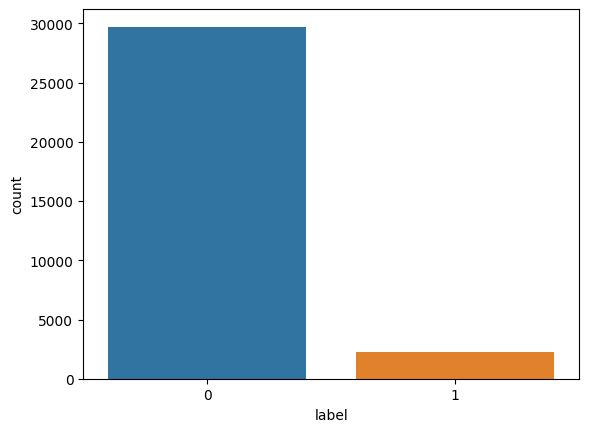

In [41]:
sns.countplot(x='label',data=df)

# wordcloud of negative tweet

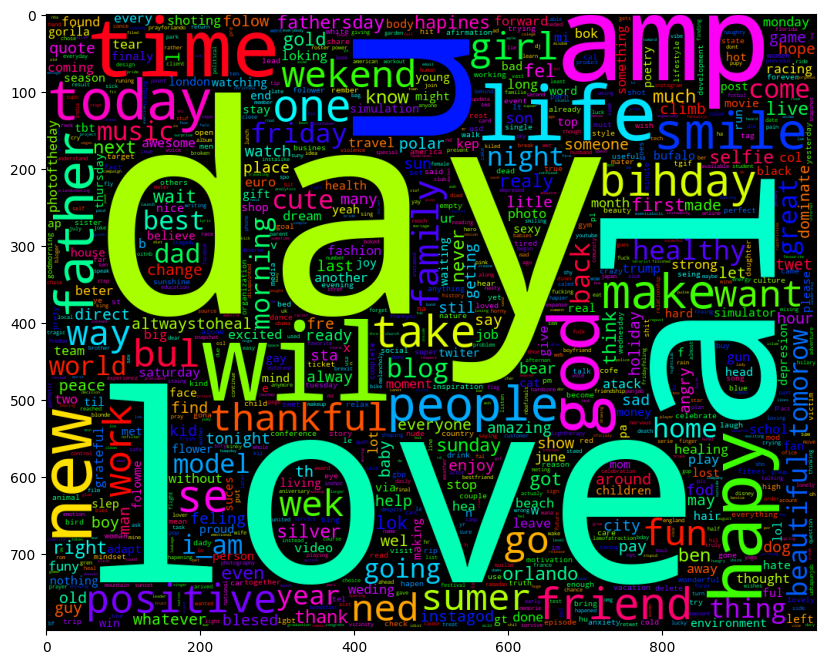

In [42]:
negative= df.loc[df['label']==0,'tweet']
plt.figure(figsize=(20,8))
wc = WordCloud(max_words=1000,width=1000,height=800,collocations=False,colormap='hsv').generate(''.join(negative))
plt.imshow(wc)

# wordcloud of positive tweet

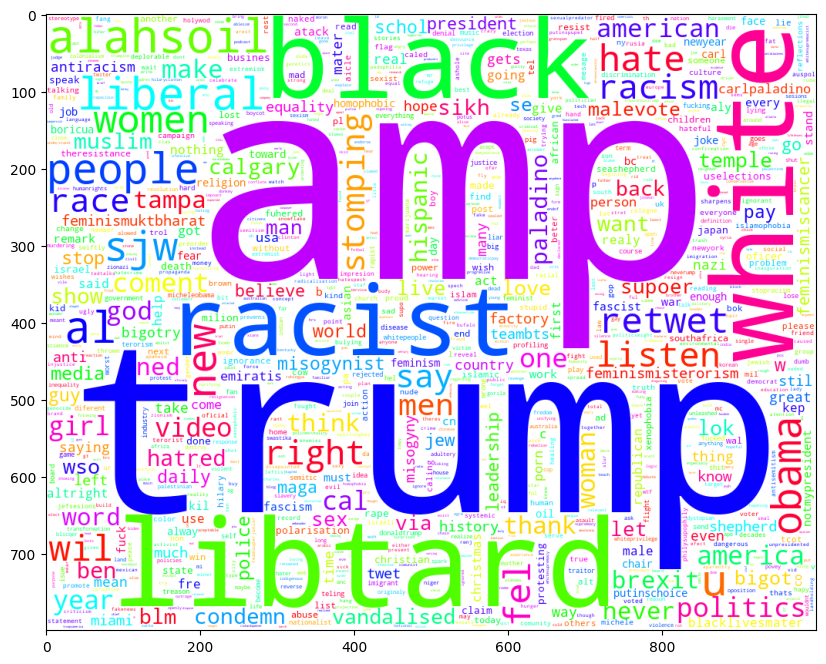

In [43]:
positive= df.loc[df['label']==1,'tweet']
plt.figure(figsize=(20,8))
wc=WordCloud(max_words=1000,height=800,width=1000,collocations=False,colormap='hsv',background_color='white').generate(''.join(positive))
plt.imshow(wc)

# extract hashtages

In [44]:
def extract_hashtag(text):
    all_hashtag=[]
    for i in text:
        hashtag=re.findall(r"#(\w+)",i)
        all_hashtag.append(hashtag)
    return all_hashtag

In [45]:
negative_hashtag=extract_hashtag(df['tweet'][df['label']==0])
positive_hashtag=extract_hashtag(df['tweet'][df['label']==1])
negative_hashtag = sum(negative_hashtag,[])
positive_hashtag = sum(positive_hashtag,[])

# barplot of negative hashtag

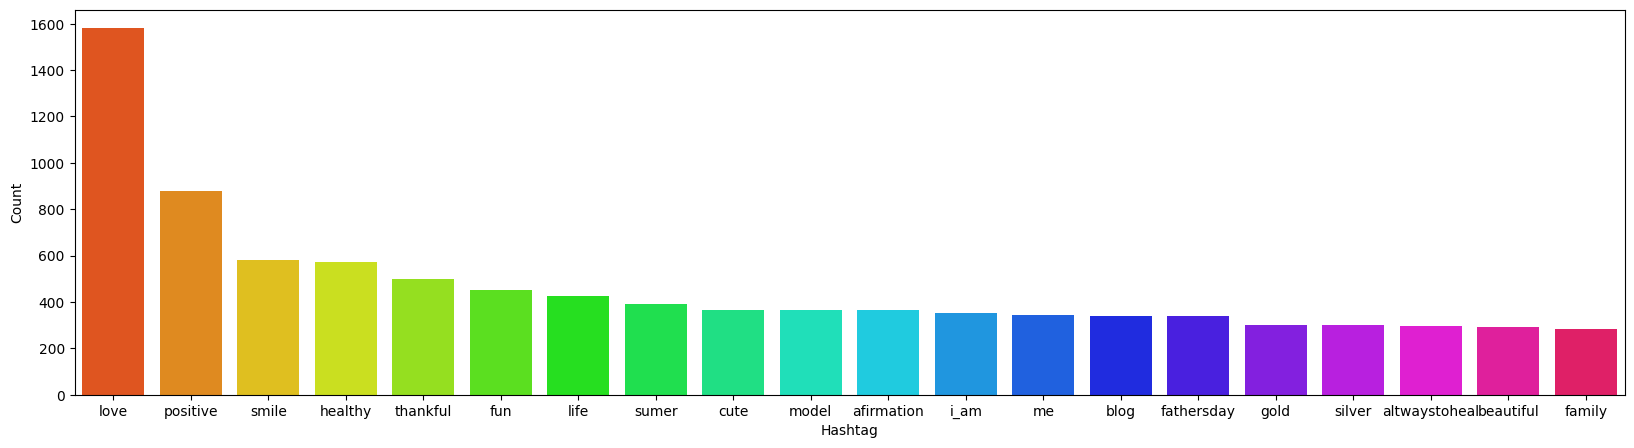

In [46]:
negative= nltk.FreqDist(negative_hashtag)
negative_hash = pd.DataFrame({'Hashtag': list(negative.keys()),
                  'Count': list(negative.values())})    
negative_hash = negative_hash.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=negative_hash, x= "Hashtag", y = "Count",palette='hsv')
ax.set(ylabel = 'Count')
plt.show()

# barplot of positive hashtag

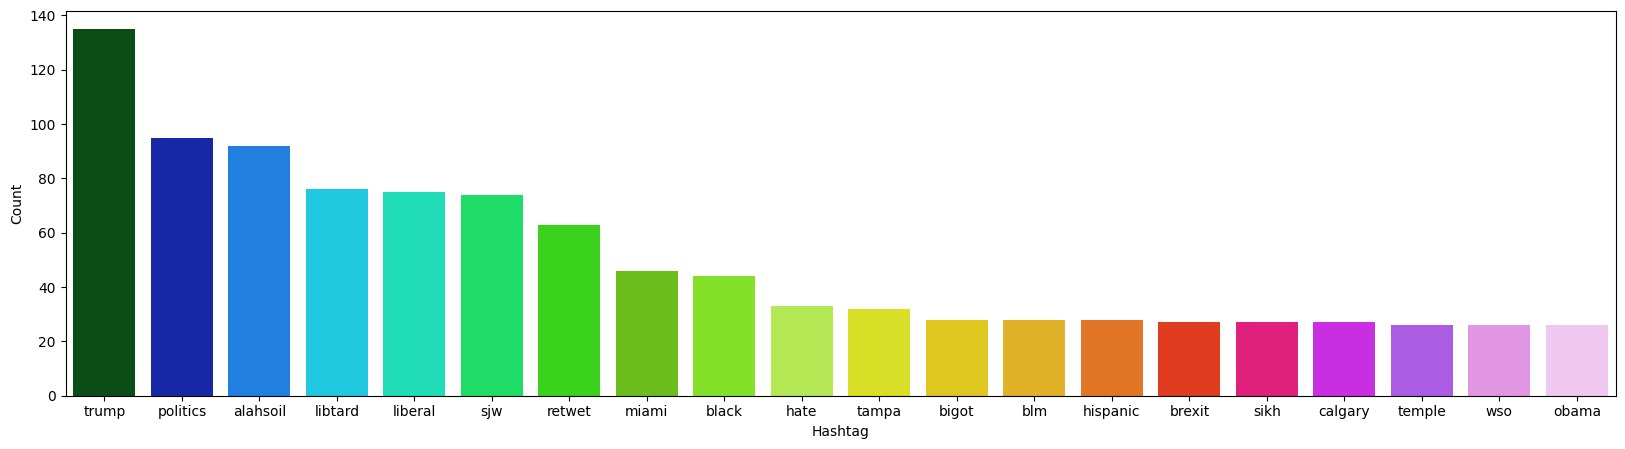

In [47]:
positive= nltk.FreqDist(positive_hashtag)
positive_hash = pd.DataFrame({'Hashtag': list(positive.keys()),
                  'Count': list(positive.values())})    
positive_hash = positive_hash.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=positive_hash, x= "Hashtag", y = "Count",palette='gist_ncar')
ax.set(ylabel = 'Count')
plt.show()

In [48]:
#def remove_stopword(text):
   # return "     ".join([word for word in str(text).split() if word not in stopword])